# Probabilistic Binary Classifier (Part 2)

## Gaussian Naive Bayes
General form of the **Gaussian density function**:
$$P(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\big(\frac{x-\mu}{\sigma}\big)^2}$$

🥅 Use the Gaussian density function to calculate how age affects the chances to survive.

### Actual distribution of passenger age

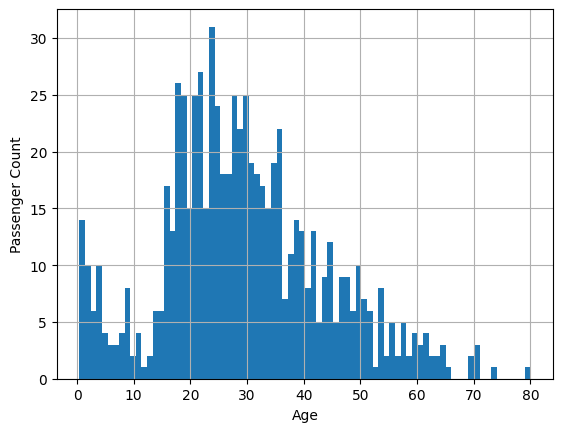

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('../../../titanic_data/train.csv')

# Plot the histogram
train["Age"].hist(bins=80)

# Add labels
plt.xlabel("Age")
plt.ylabel("Passenger Count")

# Show the plot
plt.show()

In [8]:
# Calculate the mean and standard deviation of the Age category
age_mean = train["Age"].mean()
age_std = train["Age"].std()
print('The average passenger age is {:.1f} years old.'.format(age_mean))
print('The standard deviation for passenger age is {:.1f} years.'.format(age_std))

The average passenger age is 29.7 years old.
The standard deviation for passenger age is 14.5 years.


### Calculating the modifier and informativeness of the age 29

$$mod_\text{age=29}=\frac{P(\text{Age}=29|\text{Survived})}{P(\text{Age=29})}$$

In [9]:
from math import exp, sqrt, pi

survivors = train[train.Survived.eq(1)]

def gaussian_density(mu,sigma,age):
    return 1/(sigma*sqrt(2*pi))*exp(-0.5*((age-mu)/sigma)**2)

survivor_age_mean = survivors["Age"].mean()
survivor_age_std = survivors["Age"].std()
print('The average survivor age is {:.1f}. The standard deviation is {:.1f}'.format(survivor_age_mean, survivor_age_std))

# calculate the Informativeness of the age of 29
p_surv_age29 = gaussian_density(survivor_age_mean, survivor_age_std, 29)
p_age29 = gaussian_density(age_mean, age_std, 29)
m_age29 = p_surv_age29 / p_age29
i_age29 = abs(m_age29-1)
print('The modifier of the age of 29 is {:.2f}.'.format(m_age29))
print('Its informativeness is {:.2f}.'.format(i_age29))

The average survivor age is 28.3. The standard deviation is 15.0
The modifier of the age of 29 is 0.97.
Its informativeness is 0.03.


#### Conclusion
The modifier of age 29 is near 1 and the informativeness of age 29 is near zero. This tells us that having an age of 29 does not have much of an effect on the probability of survival. 

### Calculating the modifier and informativeness of other ages

In [10]:
# calculate the Informativeness of the age of 70
p_surv_age70 = gaussian_density(survivor_age_mean, survivor_age_std, 70)
p_age70 = gaussian_density(age_mean, age_std, 70)
m_age70 = p_surv_age70 / p_age70
i_age70 = abs(m_age70-1)
print('The modifier of the age of 70 is {:.2f}.'.format(m_age70))
print('Its informativeness is {:.2f}.\n'.format(i_age70))

# calculate the Informativeness of the age of 5
p_surv_age5 = gaussian_density(survivor_age_mean, survivor_age_std, 5)
p_age5 = gaussian_density(age_mean, age_std, 5)
m_age5 = p_surv_age5 / p_age5
i_age5 = abs(m_age5-1)
print('The modifier of the age of 5 is {:.2f}.'.format(m_age5))
print('Its informativeness is {:.2f}.'.format(i_age5))

The modifier of the age of 70 is 0.94.
Its informativeness is 0.06.

The modifier of the age of 5 is 1.22.
Its informativeness is 0.22.


#### Conclusion
The modifier of the age of 70 is not much different from the modifier of 29, but an age of 5 years results in an increased probability of survival.